In [1]:
# huggingface transformers 教程来完成各项NLP任务
import warnings
warnings.filterwarnings("ignore")

# 1.transformers支持的任务：
from transformers import pipelines
type_task = sorted([(v['type'], k) for k,v in pipelines.SUPPORTED_TASKS.items()], key=lambda x:x[0])
print('support %d tasks as followings:')
for t in type_task:
    print(t[0],':', t[1])
    
# 2.huggingface支持的模型： https://huggingface.co/models
# 加载tokenizer和model模型到本地: 这里采用roberta-base-finetuned-dianping-chinese模型
from transformers import AutoModel, AutoTokenizer
model_url = "uer/roberta-base-finetuned-dianping-chinese"
model_dirpath = './models/roberta-base-finetuned-dianping-chinese'
model = AutoModel.from_pretrained(model_url)
tokenizer = AutoTokenizer.from_pretrained(model_url)
model.save_pretrained(model_dirpath)
tokenizer.save_pretrained(model_dirpath)
model = AutoModel.from_pretrained(model_dirpath)
tokenizer = AutoTokenizer.from_pretrained(model_dirpath)

# 数据集下载、保存、加载
from datasets import load_dataset, load_from_disk
data_fpath = "./data/madao33-new-title-chinese"
dataset = load_dataset("madao33/new-title-chinese") # 从互联网下载
dataset.save_to_disk(data_fpath) # 保存
dataset = load_from_disk(data_fpath) # 加载
ner_datasets = load_dataset("peoples_daily_ner")
dataset.save_to_disk('./data/peoples_daily_ner') # 保存
datasets = load_dataset("cmrc2018")
dataset.save_to_disk('./data/cmrc2018') # 保存
from datasets import DatasetDict
dataset = DatasetDict.load_from_disk("./c3/")
dataset.save_to_disk('./data/c3') # 保存

support %d tasks as followings:
audio : audio-classification
image : image-classification
image : depth-estimation
multimodal : automatic-speech-recognition
multimodal : feature-extraction
multimodal : visual-question-answering
multimodal : document-question-answering
multimodal : zero-shot-image-classification
multimodal : zero-shot-audio-classification
multimodal : image-segmentation
multimodal : image-to-text
multimodal : object-detection
multimodal : zero-shot-object-detection
multimodal : mask-generation
text : text-classification
text : token-classification
text : question-answering
text : table-question-answering
text : fill-mask
text : summarization
text : translation
text : text2text-generation
text : text-generation
text : zero-shot-classification
text : conversational
video : video-classification


Found cached dataset csv (/Users/fubin/.cache/huggingface/datasets/madao33___csv/madao33--new-title-chinese-2423910db071caac/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317)


  0%|          | 0/2 [00:00<?, ?it/s]

Saving the dataset (0/1 shards):   0%|          | 0/5850 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1679 [00:00<?, ? examples/s]

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/20865 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2319 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/4637 [00:00<?, ? examples/s]

Dataset peoples_daily_ner downloaded and prepared to /Users/fubin/Downloads/复习/NLP/src/./data/peoples_daily_ner/peoples_daily_ner/peoples_daily_ner/1.0.0/594461a1b34f61af9346123a420b9ea40f15c0e835562053bf025cef188477f5. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [3]:
# 基础类：
# 分词+编码

from transformers import AutoTokenizer, AutoModelForSequenceClassification
import warnings
warnings.filterwarnings("ignore")
model_dirpath = './models/roberta-base-finetuned-dianping-chinese'

# 第一次线上下载：
tokenizer = AutoTokenizer.from_pretrained(model_dirpath, use_fast=True) # true则采用快速分词，否则采用慢速分词，默认是快速分词
print('词典：', tokenizer.vocab_size, '...') #  tokenizer.vocab, 
model = AutoModelForSequenceClassification.from_pretrained(model_dirpath)
# 保存后，再读取
# tokenizer.save_pretrained("./modules/roberta_tokenizer")
# tokenizer = AutoTokenizer.from_pretrained("./modules/roberta_tokenizer/")
# model.save_pretrained("./modules/roberta_seqclassification")
# model = AutoModelForSequenceClassification.from_pretrained("./modules/roberta_seqclassification/")

# 分词：model.config.id2label
inputs = tokenizer("我觉得不太行！", return_tensors="pt") # 返回pytorch tensor数据类型
print('直接编码：', inputs)
# 分词编码后喂给模型
res = model(**inputs)
print('模型输出：', res)

# 分词编码过程详细分析：
sentence = '今天食堂的饭菜好难吃啊！'
# 1.句子分词
tokens = tokenizer.tokenize(sentence)
print('句子分词：', tokens)
# 2.将词序列转换为id序列
ids = tokenizer.convert_tokens_to_ids(tokens)
print('分词编码：', ids)
# 3.编码转词
tokens = tokenizer.convert_ids_to_tokens(ids)
print('分词解码：', tokens)

# 分词编码简化编码-解码过程：带特殊字符
ids = tokenizer.encode(sentence, add_special_tokens=True, padding="max_length", max_length=20)
print('带特殊字符的编码过程：', ids)
tokens = tokenizer.decode(ids, skip_special_tokens=False, max_length=20, truncation=True)
print('带特殊字符的解码过程：', tokens)

词典： 21128 ...


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at ./models/roberta-base-finetuned-dianping-chinese and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


直接编码： {'input_ids': tensor([[ 101, 2769, 6230, 2533,  679, 1922, 6121, 8013,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1]])}
模型输出： SequenceClassifierOutput(loss=None, logits=tensor([[-0.1940,  0.0912]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)
句子分词： ['今', '天', '食', '堂', '的', '饭', '菜', '好', '难', '吃', '啊', '！']
分词编码： [791, 1921, 7608, 1828, 4638, 7649, 5831, 1962, 7410, 1391, 1557, 8013]
分词解码： ['今', '天', '食', '堂', '的', '饭', '菜', '好', '难', '吃', '啊', '！']
带特殊字符的编码过程： [101, 791, 1921, 7608, 1828, 4638, 7649, 5831, 1962, 7410, 1391, 1557, 8013, 102, 0, 0, 0, 0, 0, 0]
带特殊字符的解码过程： [CLS] 今 天 食 堂 的 饭 菜 好 难 吃 啊 ！ [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


In [3]:
# 基础类： Dataset

from datasets import load_dataset
import warnings
warnings.filterwarnings("ignore")
model_dirpath = './models/roberta-base-finetuned-dianping-chinese'
data_fpath = "./data/madao33-new-title-chinese"

# 加载数据
dataset = load_dataset(data_fpath)
# boolq_dataset = load_dataset("super_glue", "boolq") # 加载某项任务数据
# dataset = load_dataset("madao33/new-title-chinese", split="train")
# dataset = load_dataset("madao33/new-title-chinese", split="train[10:100]")
# dataset = load_dataset("madao33/new-title-chinese", split="train[:50%]")
# dataset = load_dataset("madao33/new-title-chinese", split=["train[:50%]", "train[50%:]"])
# 划分数据
# dataset.train_test_split(test_size=0.1)
# dataset.train_test_split(test_size=0.1, stratify_by_column="label")     # 分类数据集可以按照比例划分
# 过滤
# filter_dataset = dataset["train"].filter(lambda example: "中国" in example["title"])
def add_prefix(example):
    example["title"] = 'Prefix: ' + example["title"]
    return example
prefix_dataset = dataset.map(add_prefix)
# def process_function(examples):
#     tokenized_examples = tokenizer(examples["review"], max_length=128, truncation=True)
#     tokenized_examples["labels"] = examples["label"]
#     return tokenized_examples
# tokenized_dataset = dataset.map(process_function, batched=True, remove_columns=dataset.column_names)


Found cached dataset csv (/Users/fubin/.cache/huggingface/datasets/madao33___csv/madao33--new-title-chinese-2423910db071caac/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317)


  0%|          | 0/2 [00:00<?, ?it/s]

Loading cached processed dataset at /Users/fubin/.cache/huggingface/datasets/madao33___csv/madao33--new-title-chinese-2423910db071caac/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317/cache-d8830fc13ea72998.arrow
Loading cached processed dataset at /Users/fubin/.cache/huggingface/datasets/madao33___csv/madao33--new-title-chinese-2423910db071caac/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317/cache-8f471df9b551fcc5.arrow


Saving the dataset (0/1 shards):   0%|          | 0/5850 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1679 [00:00<?, ? examples/s]

['precision', 'code_eval', 'roc_auc', 'cuad', 'xnli', 'rouge', 'pearsonr', 'mse', 'super_glue', 'comet', 'cer', 'sacrebleu', 'mahalanobis', 'wer', 'competition_math', 'f1', 'recall', 'coval', 'mauve', 'xtreme_s', 'bleurt', 'ter', 'accuracy', 'exact_match', 'indic_glue', 'spearmanr', 'mae', 'squad', 'chrf', 'glue', 'perplexity', 'mean_iou', 'squad_v2', 'meteor', 'bleu', 'wiki_split', 'sari', 'frugalscore', 'google_bleu', 'bertscore', 'matthews_correlation', 'seqeval', 'trec_eval', 'rl_reliability', 'poseval', 'brier_score', 'mase', 'mape', 'smape', 'nist_mt', 'character', 'charcut_mt', 'r_squared', 'mcnemar', 'exact_match', 'wilcoxon', 'word_length', 'word_count', 'text_duplicates', 'perplexity', 'label_distribution', 'toxicity', 'regard', 'honest']
单个累积： {'accuracy': 0.5}
batch累积： {'accuracy': 0.5}
{'accuracy': 0.6666666666666666, 'f1': 0.6666666666666666, 'recall': 0.5, 'precision': 1.0}


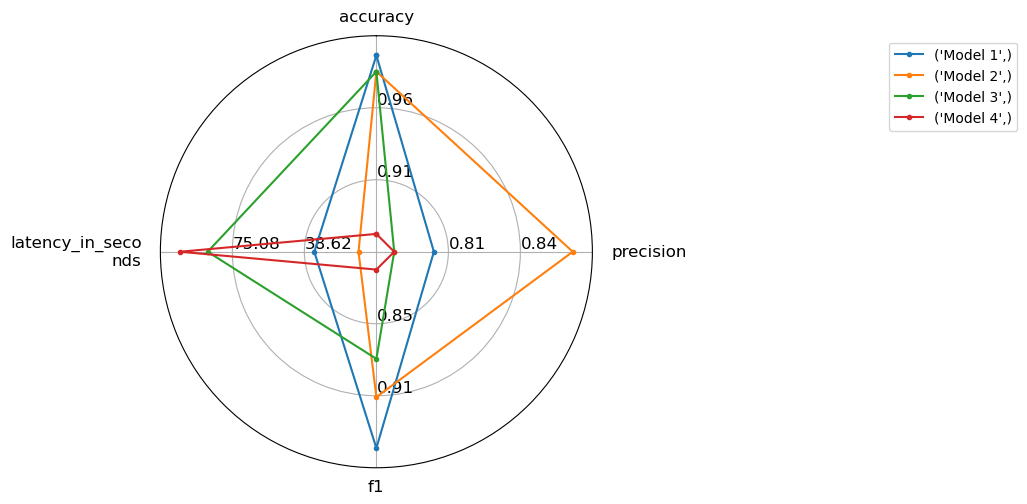

In [1]:
# 基础类：评价标准
import evaluate
from evaluate.visualization import radar_plot
import warnings
warnings.filterwarnings("ignore")

# 评价标准总表
print([d['name'] for d in evaluate.list_evaluation_modules(include_community=False, with_details=True)])

# 评价：
accuracy = evaluate.load("accuracy")
for ref, pred in zip([0,1,0,1], [1,0,0,1]):
    accuracy.add(references=ref, predictions=pred)
print('单个累积：', accuracy.compute())
for refs, preds in zip([[0,1],[0,1]], [[1,0],[0,1]]):
    accuracy.add_batch(references=refs, predictions=preds)
print('batch累积：', accuracy.compute())
# 多个评价标准
clf_metrics = evaluate.combine(["accuracy", "f1", "recall", "precision"])
result = clf_metrics.compute(predictions=[0, 1, 0], references=[0, 1, 1])
print(result)
# 画雷达图
data = [{"accuracy": 0.99, "precision": 0.8, "f1": 0.95, "latency_in_seconds": 33.6},
   {"accuracy": 0.98, "precision": 0.87, "f1": 0.91, "latency_in_seconds": 11.2},
   {"accuracy": 0.98, "precision": 0.78, "f1": 0.88, "latency_in_seconds": 87.6}, 
   {"accuracy": 0.88, "precision": 0.78, "f1": 0.81, "latency_in_seconds": 101.6} ]
plot = radar_plot(data=data, model_names=["Model 1", "Model 2", "Model 3", "Model 4"])
plot.show();

In [3]:
# 提高类：封装Dataset和DataLoader
# 自定义数据集

import pandas as pd
from torch.utils.data import Dataset, DataLoader, random_split
import torch
from torch.optim import Adam
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
import warnings
warnings.filterwarnings("ignore")
model_dirpath = './models/roberta-base-finetuned-dianping-chinese'
device = torch.device("cuda:0" if torch.cuda.is_available() else ('mps:0' if torch.backends.mps.is_available() else "cpu"))
data_fpath = "./data/ChnSentiCorp/ChnSentiCorp_htl_all.csv"

# 自定义数据集并预处理和加载
class MyDataset(Dataset):
    def __init__(self, data: pd.DataFrame) -> None:
        super().__init__()
        self.data = data
        self.data = self.data.dropna()
    def __getitem__(self, index):
        return self.data.iloc[index]["review"], self.data.iloc[index]["label"]
    def __len__(self):
        return len(self.data)
dataset = MyDataset(pd.read_csv(data_fpath).head(64*10))
trainset, validset = random_split(dataset, lengths=[0.9, 0.1])
print(len(trainset), len(validset))
tokenizer = AutoTokenizer.from_pretrained(model_dirpath)
def collate_func(batch):
    texts, labels = [], []
    for item in batch:
        texts.append(item[0])
        labels.append(item[1])
    inputs = tokenizer(texts, max_length=128, padding="max_length", truncation=True, return_tensors="pt")
    inputs["labels"] = torch.tensor(labels)
    return inputs
trainloader = DataLoader(trainset, batch_size=32, shuffle=True, collate_fn=collate_func)
validloader = DataLoader(validset, batch_size=64, shuffle=False, collate_fn=collate_func)

# 模型、训练
model = AutoModelForSequenceClassification.from_pretrained(model_dirpath).to(device)
optimizer = Adam(model.parameters(), lr=2e-5)
def evaluate():
    model.eval()
    acc_num = 0
    with torch.inference_mode():
        for batch in validloader:
            batch = {k: v.to(device) for k, v in batch.items()}
            output = model(**batch)
            pred = torch.argmax(output.logits, dim=-1)
            acc_num += (pred.long() == batch["labels"].long()).float().sum()
    return acc_num / len(validset)

def train(epoch=1, log_step=100):
    for ep in range(epoch):
        model.train()
        for i, batch in enumerate(trainloader):
            batch = {k: v.to(device) for k, v in batch.items()}
            optimizer.zero_grad()
            output = model(**batch)
            output.loss.backward()
            optimizer.step()
            print(f"ep: {ep+1}, local_step: {i+1}, loss: {output.loss.item()}")
        acc = evaluate()
        print(f"ep: {ep}, acc: {acc}")
train()
# 预测
sen = "我觉得这家酒店不错，饭很好吃！"
model.eval()
model.config.id2label = {0: "差评！", 1: "好评！"}
pipe = pipeline("text-classification", model=model, tokenizer=tokenizer, device=device)
pipe(sen)

576 64
ep: 1, local_step: 1, loss: 0.7810053825378418
ep: 1, local_step: 2, loss: 0.7198745012283325
ep: 1, local_step: 3, loss: 0.6048681735992432
ep: 1, local_step: 4, loss: 0.6180012226104736
ep: 1, local_step: 5, loss: 0.27919960021972656
ep: 1, local_step: 6, loss: 0.2787778377532959
ep: 1, local_step: 7, loss: 0.27635517716407776
ep: 1, local_step: 8, loss: 0.12575605511665344
ep: 1, local_step: 9, loss: 0.16460415720939636
ep: 1, local_step: 10, loss: 0.1353130340576172
ep: 1, local_step: 11, loss: 0.13470979034900665
ep: 1, local_step: 12, loss: 0.09783849120140076
ep: 1, local_step: 13, loss: 0.05854212865233421
ep: 1, local_step: 14, loss: 0.09134873747825623
ep: 1, local_step: 15, loss: 0.05543891340494156
ep: 1, local_step: 16, loss: 0.020365536212921143
ep: 1, local_step: 17, loss: 0.037340205162763596
ep: 1, local_step: 18, loss: 0.02863709256052971
ep: 0, acc: 1.0
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabl

Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[{'label': '好评！', 'score': 0.9916306138038635}]

In [3]:
# 封装训练器：Trainer 和 TrainingArguments
# AutoModelForSequenceClassification

import torch, evaluate
from transformers import AutoTokenizer, AutoModelForSequenceClassification, DataCollatorWithPadding, Trainer, TrainingArguments, pipeline
from datasets import load_dataset
import warnings
warnings.filterwarnings("ignore")
model_dirpath = './models/roberta-base-finetuned-dianping-chinese'
data_fpath = "./data/ChnSentiCorp/ChnSentiCorp_htl_all.csv"
checkpoints_dirpath = './checkpoints'
device = torch.device("cuda:0" if torch.cuda.is_available() else ('mps:0' if torch.backends.mps.is_available() else "cpu"))

# 加载数据
dataset = load_dataset("csv", data_files=data_fpath, split="train[:640]")
dataset = dataset.filter(lambda x: x["review"] is not None)
datasets = dataset.train_test_split(test_size=0.1)
tokenizer = AutoTokenizer.from_pretrained("hfl/rbt3")
def process_function(examples):
    tokenized_examples = tokenizer(examples["review"], max_length=128, truncation=True)
    tokenized_examples["labels"] = examples["label"]
    return tokenized_examples
tokenized_datasets = datasets.map(process_function, batched=True, remove_columns=datasets["train"].column_names)
# 评估标准
acc_metric = evaluate.load("accuracy")
f1_metirc = evaluate.load("f1")
def eval_metric(eval_predict):
    predictions, labels = eval_predict
    predictions = predictions.argmax(axis=-1)
    acc = acc_metric.compute(predictions=predictions, references=labels)
    f1 = f1_metirc.compute(predictions=predictions, references=labels)
    acc.update(f1)
    return acc
# 模型训练
model = AutoModelForSequenceClassification.from_pretrained(model_dirpath)
train_args = TrainingArguments(output_dir=checkpoints_dirpath,      # 输出文件夹
                               per_device_train_batch_size=64,  # 训练时的batch_size
                               per_device_eval_batch_size=128,  # 验证时的batch_size
                               logging_steps=10,                # log 打印的频率
                               evaluation_strategy="epoch",     # 评估策略
                               save_strategy="epoch",           # 保存策略
                               save_total_limit=3,              # 最大保存数
                               learning_rate=2e-5,              # 学习率
                               weight_decay=0.01,               # weight_decay
                               metric_for_best_model="f1",      # 设定评估指标
                               num_train_epochs=1,
                               load_best_model_at_end=True)     # 训练完成后加载最优模型
trainer = Trainer(model=model,  args=train_args, train_dataset=tokenized_datasets["train"], eval_dataset=tokenized_datasets["test"], data_collator=DataCollatorWithPadding(tokenizer=tokenizer), compute_metrics=eval_metric)
trainer.train()
# 模型预测
model.eval()
sen = "我觉得这家酒店不错，饭很好吃！"
model.config.id2label = {0: "差评！", 1: "好评！"}
pipe = pipeline("text-classification", model=model, tokenizer=tokenizer, device=device)
print(pipe(sen))

Found cached dataset csv (/Users/fubin/.cache/huggingface/datasets/csv/default-797321f2014d2b18/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317)
Loading cached processed dataset at /Users/fubin/.cache/huggingface/datasets/csv/default-797321f2014d2b18/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317/cache-e5f6a43ee00b7131.arrow


Map:   0%|          | 0/576 [00:00<?, ? examples/s]

Map:   0%|          | 0/64 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at ./models/roberta-base-finetuned-dianping-chinese and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
[{'label': '好评！', 'score': 0.7101271748542786}]


In [1]:
# 任务类：
# 命名实体识别, AutoModelForTokenClassification

import evaluate, torch, seqeval
import numpy as np
from datasets import DatasetDict
from transformers import AutoTokenizer, AutoModelForTokenClassification, TrainingArguments, Trainer, DataCollatorForTokenClassification
import warnings
warnings.filterwarnings("ignore")
model_dirpath = './models/roberta-base-finetuned-dianping-chinese'
data_fpath = './data/peoples_daily_ner'
checkpoints_dirpath = './checkpoints'
device = torch.device("cuda:0" if torch.cuda.is_available() else ('mps:0' if torch.backends.mps.is_available() else "cpu"))

ner_datasets = DatasetDict.load_from_disk(data_fpath)
label_list = ner_datasets["train"].features["ner_tags"].feature.names
print(label_list)
tokenizer = AutoTokenizer.from_pretrained(model_dirpath)
model = AutoModelForTokenClassification.from_pretrained(model_dirpath, num_labels=len(label_list)) # 已封装
seqeval = evaluate.load("./scripts/seqeval_metric.py")

# 借助word_ids 实现标签映射
def process_function(examples):
    tokenized_exmaples = tokenizer(examples["tokens"], max_length=128, truncation=True, is_split_into_words=True)
    labels = []
    for i, label in enumerate(examples["ner_tags"]):
        word_ids = tokenized_exmaples.word_ids(batch_index=i)
        label_ids = []
        for word_id in word_ids:
            if word_id is None:
                label_ids.append(-100)
            else:
                label_ids.append(label[word_id])
        labels.append(label_ids)
    tokenized_exmaples["labels"] = labels
    return tokenized_exmaples
tokenized_datasets = ner_datasets.map(process_function, batched=True)

# 评估标准
def eval_metric(pred):
    predictions, labels = pred
    predictions = np.argmax(predictions, axis=-1)
    # 将id转换为原始的字符串类型的标签
    true_predictions = [[label_list[p] for p, l in zip(prediction, label) if l != -100] for prediction, label in zip(predictions, labels)]
    true_labels = [[label_list[l] for p, l in zip(prediction, label) if l != -100] for prediction, label in zip(predictions, labels)]
    result = seqeval.compute(predictions=true_predictions, references=true_labels, mode="strict", scheme="IOB2")
    return {"f1": result["overall_f1"]}

# 训练和评估
# args = TrainingArguments(output_dir="./models/models_for_ner", per_device_train_batch_size=64, per_device_eval_batch_size=128, evaluation_strategy="epoch",
#     save_strategy="epoch", metric_for_best_model="f1", load_best_model_at_end=True, logging_steps=50, num_train_epochs=1)
# trainer = Trainer(model=model, args=args, train_dataset=tokenized_datasets["train"], eval_dataset=tokenized_datasets["validation"],
#     compute_metrics=eval_metric, data_collator=DataCollatorForTokenClassification(tokenizer=tokenizer))
# trainer.train()
# print(trainer.evaluate(eval_dataset=tokenized_datasets["test"]))
# 封装成pipeline
from transformers import pipeline
ner_pipe = pipeline("token-classification", model=model, tokenizer=tokenizer, device=device, aggregation_strategy="simple")
# 测试
print(ner_pipe("小明在北京上班"))
# 效果不是很好，一方面这个模型不适合序列标注，另一方面没有进行微调

['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC']


Some weights of BertForTokenClassification were not initialized from the model checkpoint at ./models/roberta-base-finetuned-dianping-chinese and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Loading cached processed dataset at /Users/fubin/Downloads/复习/NLP/src/data/peoples_daily_ner/train/cache-75b45d5bccc8ba28.arrow
Loading cached processed dataset at /Users/fubin/Downloads/复习/NLP/src/data/peoples_daily_ner/validation/cache-22edf8801460533b.arrow


Map:   0%|          | 0/4637 [00:00<?, ? examples/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
[{'entity_group': 'LABEL_0', 'score': 0.1744266, 'word': '小 明', 'start': 0, 'end': 2}, {'entity_group': 'LABEL_6', 'score': 0.1764205, 'word': '在', 'start': 2, 'end': 3}, {'entity_group': 'LABEL_0', 'score': 0.20054242, 'word': '北 京 上 班', 'start': 3, 'end': 7}]


In [2]:
# 任务类
# 文本分类：情感分类pipeline简单实现, AutoModelForSequenceClassification

# 设置推理设备
import torch
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
import warnings
warnings.filterwarnings("ignore")
model_dirpath = './models/roberta-base-finetuned-dianping-chinese'
device = torch.device("cuda:0" if torch.cuda.is_available() else ('mps:0' if torch.backends.mps.is_available() else "cpu"))

# 1.加载线上模型:第一次会下载
pipe1 = pipeline("text-classification", device=device) # device=0表示cuda:0
pipe2 = pipeline("text-classification", model=model_dirpath, device=device) # device=0表示cuda:0
print("very good!", pipe1("very good!"), pipe2("very good!"))
print("我觉得不太行！", pipe1("我觉得不太行！"), pipe2("我觉得不太行！"))

# 2.加载本地模型：必须同时指定model和tokenizer
from transformers import AutoModelForSequenceClassification, AutoTokenizer
model = AutoModelForSequenceClassification.from_pretrained(model_dirpath)
tokenizer = AutoTokenizer.from_pretrained(model_dirpath)
pipe = pipeline("text-classification", model=model, tokenizer=tokenizer, device=device) # device=0表示cuda:0
print("我觉得不太行！", pipe("我觉得不太行！"), "very good!", pipe("very good!"))


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at ./models/roberta-base-finetuned-dianping-chinese and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


very good! [{'label': 'POSITIVE', 'score': 0.9998525381088257}] [{'label': 'negative (stars 1, 2 and 3)', 'score': 0.5701478123664856}]
我觉得不太行！ [{'label': 'NEGATIVE', 'score': 0.5539907813072205}] [{'label': 'positive (stars 4 and 5)', 'score': 0.5074054598808289}]


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at ./models/roberta-base-finetuned-dianping-chinese and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


我觉得不太行！ [{'label': 'positive (stars 4 and 5)', 'score': 0.568372368812561}] very good! [{'label': 'negative (stars 1, 2 and 3)', 'score': 0.6013391613960266}]


In [3]:
# 任务类：
# 问答系统：pipeline简单实现
import torch
import warnings
warnings.filterwarnings("ignore")
model_dirpath = './models/roberta-base-finetuned-dianping-chinese'
device = torch.device("cuda:0" if torch.cuda.is_available() else ('mps:0' if torch.backends.mps.is_available() else "cpu"))

qa_pipe = pipeline("question-answering", model=model_dirpath, device=device)
print("中国的首都是哪里？", qa_pipe(question="中国的首都是哪里？", context="中国的首都是北京", max_answer_len=2))

Some weights of BertForQuestionAnswering were not initialized from the model checkpoint at ./models/roberta-base-finetuned-dianping-chinese and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


中国的首都是哪里？ {'score': 0.013369468040764332, 'start': 1, 'end': 3, 'answer': '国的'}


In [1]:
# 任务类：
# 问答系统：截断策略简单实现, AutoModelForQuestionAnswering

import torch
from datasets import load_dataset, DatasetDict
from transformers import AutoTokenizer, AutoModelForQuestionAnswering, TrainingArguments, Trainer, DefaultDataCollator
import warnings
warnings.filterwarnings("ignore")
device = torch.device("cuda:0" if torch.cuda.is_available() else ('mps:0' if torch.backends.mps.is_available() else "cpu"))
model_dirpath = './models/roberta-base-finetuned-dianping-chinese'
datasets = DatasetDict.load_from_disk("./data/cmrc2018")
tokenizer = AutoTokenizer.from_pretrained(model_dirpath)
sample_dataset = datasets["train"].select(range(10))
tokenized_examples = tokenizer(text=sample_dataset["question"], text_pair=sample_dataset["context"], return_offsets_mapping=True, max_length=512, truncation="only_second", padding="max_length")
def process_func(examples):
    tokenized_examples = tokenizer(text=examples["question"], text_pair=examples["context"], return_offsets_mapping=True, max_length=384, truncation="only_second", padding="max_length")
    offset_mapping = tokenized_examples.pop("offset_mapping")
    start_positions = []
    end_positions = []
    for idx, offset in enumerate(offset_mapping):
        answer = examples["answers"][idx]
        start_char = answer["answer_start"][0]
        end_char = start_char + len(answer["text"][0])
        # 定位答案在token中的起始位置和结束位置
        # 一种策略，我们要拿到context的起始和结束，然后从左右两侧向答案逼近
        context_start = tokenized_examples.sequence_ids(idx).index(1)
        context_end = tokenized_examples.sequence_ids(idx).index(None, context_start) - 1
        # 判断答案是否在context中
        if offset[context_end][1] < start_char or offset[context_start][0] > end_char:
            start_token_pos = 0
            end_token_pos = 0
        else:
            token_id = context_start
            while token_id <= context_end and offset[token_id][0] < start_char:
                token_id += 1
            start_token_pos = token_id
            token_id = context_end
            while token_id >= context_start and offset[token_id][1] > end_char:
                token_id -=1
            end_token_pos = token_id
        start_positions.append(start_token_pos)
        end_positions.append(end_token_pos)
    tokenized_examples["start_positions"] = start_positions
    tokenized_examples["end_positions"] = end_positions
    return tokenized_examples
tokenied_datasets = datasets.map(process_func, batched=True, remove_columns=datasets["train"].column_names)
model = AutoModelForQuestionAnswering.from_pretrained(model_dirpath)
args = TrainingArguments(output_dir="./models/models_for_qa", per_device_train_batch_size=32, per_device_eval_batch_size=32,
    evaluation_strategy="epoch", save_strategy="epoch", logging_steps=50, num_train_epochs=3)
trainer = Trainer(model=model, args=args, train_dataset=tokenied_datasets["train"], eval_dataset=tokenied_datasets["validation"], data_collator=DefaultDataCollator())
# trainer.train()
from transformers import pipeline
pipe = pipeline("question-answering", model=model, tokenizer=tokenizer, device=device)
pipe(question="小明在哪里上班？", context="小明在北京上班。")

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Map:   0%|          | 0/10142 [00:00<?, ? examples/s]

Map:   0%|          | 0/3219 [00:00<?, ? examples/s]

Map:   0%|          | 0/1002 [00:00<?, ? examples/s]

Some weights of BertForQuestionAnswering were not initialized from the model checkpoint at ./models/roberta-base-finetuned-dianping-chinese and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


{'score': 0.0139765664935112, 'start': 4, 'end': 7, 'answer': '京上班'}

In [16]:
# 任务类：
# 多项选择, AutoModelForMultipleChoice

import evaluate
from datasets import DatasetDict
from transformers import AutoTokenizer, AutoModelForMultipleChoice, TrainingArguments, Trainer
model_dirpath = './models/roberta-base-finetuned-dianping-chinese'
c3 = DatasetDict.load_from_disk("./data/c3/")
tokenizer = AutoTokenizer.from_pretrained(model_dirpath)
def process_function(examples):
    # examples, dict, keys: ["context", "quesiton", "choice", "answer"]
    # examples, 1000
    context = []
    question_choice = []
    labels = []
    # print(examples.keys())
    for idx in range(len(examples["context"])):
        # print(examples["context"][idx], examples["question"][idx], examples["choice"][idx], examples["answer"][idx])
        ctx = "\n".join(examples["context"][idx])
        question = examples["question"][idx]
        choices = examples["choice"][idx]
        for choice in choices:
            context.append(ctx)
            question_choice.append(question + " " + choice)
        if len(choices) < 4:
            for _ in range(4 - len(choices)):
                context.append(ctx)
                question_choice.append(question + " " + "不知道")
        labels.append(choices.index(examples["answer"][idx]))
        # import random
        # labels.append(random.randint(0,4))
    tokenized_examples = tokenizer(context, question_choice, truncation="only_first", max_length=256, padding="max_length")     # input_ids: 4000 * 256, 
    tokenized_examples = {k: [v[i: i + 4] for i in range(0, len(v), 4)] for k, v in tokenized_examples.items()}     # 1000 * 4 *256
    tokenized_examples["labels"] = labels
    return tokenized_examples
tokenized_c3 = c3.map(process_function, batched=True)
model = AutoModelForMultipleChoice.from_pretrained(model_dirpath)
import numpy as np
accuracy = evaluate.load("accuracy")
def compute_metric(pred):
    predictions, labels = pred
    predictions = np.argmax(predictions, axis=-1)
    return accuracy.compute(predictions=predictions, references=labels)
args = TrainingArguments(output_dir="./muliple_choice", per_device_train_batch_size=16, per_gpu_eval_batch_size=16, num_train_epochs=3,
    logging_steps=50, evaluation_strategy="epoch", save_strategy="epoch", load_best_model_at_end=True, fp16=True)
trainer = Trainer(model=model, args=args, train_dataset=tokenized_c3["train"], eval_dataset=tokenized_c3["validation"], compute_metrics=compute_metric)
# trainer.train()

from typing import Any
import torch
class MultipleChoicePipeline:
    def __init__(self, model, tokenizer) -> None:
        self.model = model
        self.tokenizer = tokenizer
        self.device = model.device
    def preprocess(self, context, quesiton, choices):
        cs, qcs = [], []
        for choice in choices:
            cs.append(context)
            qcs.append(quesiton + " " + choice)
        return tokenizer(cs, qcs, truncation="only_first", max_length=256, return_tensors="pt")
    def predict(self, inputs):
        inputs = {k: v.unsqueeze(0).to(self.device) for k, v in inputs.items()}
        return self.model(**inputs).logits
    def postprocess(self, logits, choices):
        predition = torch.argmax(logits, dim=-1).cpu().item()
        return choices[predition]
    def __call__(self, context, question, choices) -> Any:
        inputs = self.preprocess(context, question, choices)
        logits = self.predict(inputs)
        result = self.postprocess(logits, choices)
        return result
pipe = MultipleChoicePipeline(model, tokenizer)
pipe("小明在北京上班", "小明在哪里上班？", ["北京", "上海", "河北", "海南", "河北", "海南"])

Map:   0%|          | 0/1625 [00:00<?, ? examples/s]

ValueError: '' is not in list

In [1]:
# 任务类：
# 文本相似度：cross单塔模式，AutoModelForSequenceClassification

import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from transformers import BertForSequenceClassification 
from datasets import load_dataset
device = torch.device("cuda:0" if torch.cuda.is_available() else ('mps:0' if torch.backends.mps.is_available() else "cpu"))
dataset = load_dataset("json", data_files="./data/train_pair_1w.json", split="train")
datasets = dataset.train_test_split(test_size=0.2)
model_dirpath = './models/roberta-base-finetuned-dianping-chinese'
tokenizer = AutoTokenizer.from_pretrained(model_dirpath)
def process_function(examples):
    tokenized_examples = tokenizer(examples["sentence1"], examples["sentence2"], max_length=128, truncation=True)
    tokenized_examples["labels"] = [float(label) for label in examples["label"]]
    return tokenized_examples
tokenized_datasets = datasets.map(process_function, batched=True, remove_columns=datasets["train"].column_names)
model = AutoModelForSequenceClassification.from_pretrained(model_dirpath, num_labels=1)
import evaluate
acc_metric = evaluate.load("accuracy")
f1_metirc = evaluate.load("f1")
def eval_metric(eval_predict):
    predictions, labels = eval_predict
    predictions = [int(p > 0.5) for p in predictions]
    labels = [int(l) for l in labels]
    # predictions = predictions.argmax(axis=-1)
    acc = acc_metric.compute(predictions=predictions, references=labels)
    f1 = f1_metirc.compute(predictions=predictions, references=labels)
    acc.update(f1)
    return acc
train_args = TrainingArguments(output_dir="./checkpoints/cross_model",      # 输出文件夹
                               per_device_train_batch_size=32,  # 训练时的batch_size
                               per_device_eval_batch_size=32,  # 验证时的batch_size
                               logging_steps=10,                # log 打印的频率
                               evaluation_strategy="epoch",     # 评估策略
                               save_strategy="epoch",           # 保存策略
                               save_total_limit=3,              # 最大保存数
                               learning_rate=2e-5,              # 学习率
                               weight_decay=0.01,               # weight_decay
                               metric_for_best_model="f1",      # 设定评估指标
                               max_steps=1,
                               load_best_model_at_end=True)     # 训练完成后加载最优模型
from transformers import DataCollatorWithPadding
trainer = Trainer(model=model, args=train_args, train_dataset=tokenized_datasets["train"], eval_dataset=tokenized_datasets["test"], 
                  data_collator=DataCollatorWithPadding(tokenizer=tokenizer), compute_metrics=eval_metric)
trainer.train()
trainer.evaluate(tokenized_datasets["test"])
from transformers import pipeline, TextClassificationPipeline
model.config.id2label = {0: "不相似", 1: "相似"}
pipe = pipeline("text-classification", model=model, tokenizer=tokenizer, device=device)
result = pipe({"text": "我喜欢北京", "text_pair": "天气怎样"}, function_to_apply="none")
result["label"] = "相似" if result["score"] > 0.5 else "不相似"
result

Found cached dataset json (/Users/fubin/.cache/huggingface/datasets/json/default-a04ab90bd0f58ecf/0.0.0/0f7e3662623656454fcd2b650f34e886a7db4b9104504885bd462096cc7a9f51)


Map:   0%|          | 0/8000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at ./models/roberta-base-finetuned-dianping-chinese and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Using the latest cached version of the module from /Users/fubin/.cache/huggingface/modules/evaluate_modules/metrics/evaluate-metric--accuracy/f887c0aab52c2d38e1f8a215681126379eca617f96c447638f751434e8e65b14 (last modified on Sun Aug 27 12:02:57 2023) since it couldn't be found locally at evaluate-metric--accuracy, or remotely on the Hugging Face Hub.
/Users/fubin/opt/anaconda3/lib/python3.9/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(

Epoch,Training Loss,Validation Loss


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


{'label': '不相似', 'score': 0.04445357993245125}

In [1]:
# 任务类：
# 文本相似度：dual 双塔模式
# 实现：自定义 DualModel(BertPreTrainedModel)

import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset
device = torch.device("cuda:0" if torch.cuda.is_available() else ('mps:0' if torch.backends.mps.is_available() else "cpu"))
dataset = load_dataset("json", data_files="./data/train_pair_1w.json", split="train")
datasets = dataset.train_test_split(test_size=0.2)
model_dirpath = './models/roberta-base-finetuned-dianping-chinese'
tokenizer = AutoTokenizer.from_pretrained(model_dirpath)
def process_function(examples):
    sentences = []
    labels = []
    for sen1, sen2, label in zip(examples["sentence1"], examples["sentence2"], examples["label"]):
        sentences.append(sen1)
        sentences.append(sen2)
        labels.append(1 if int(label) == 1 else -1)
    # input_ids, attention_mask, token_type_ids
    tokenized_examples = tokenizer(sentences, max_length=128, truncation=True, padding="max_length")
    tokenized_examples = {k: [v[i: i + 2] for i in range(0, len(v), 2)] for k, v in tokenized_examples.items()}
    tokenized_examples["labels"] = labels
    return tokenized_examples
tokenized_datasets = datasets.map(process_function, batched=True, remove_columns=datasets["train"].column_names)
from transformers import BertForSequenceClassification, BertPreTrainedModel, BertModel
from typing import Optional
from transformers.configuration_utils import PretrainedConfig
from torch.nn import CosineSimilarity, CosineEmbeddingLoss

class DualModel(BertPreTrainedModel):
    def __init__(self, config: PretrainedConfig, *inputs, **kwargs):
        super().__init__(config, *inputs, **kwargs)
        self.bert = BertModel(config)
        self.post_init()
    def forward(self,
        input_ids: Optional[torch.Tensor] = None,
        attention_mask: Optional[torch.Tensor] = None,
        token_type_ids: Optional[torch.Tensor] = None,
        position_ids: Optional[torch.Tensor] = None,
        head_mask: Optional[torch.Tensor] = None,
        inputs_embeds: Optional[torch.Tensor] = None,
        labels: Optional[torch.Tensor] = None,
        output_attentions: Optional[bool] = None,
        output_hidden_states: Optional[bool] = None,
        return_dict: Optional[bool] = None,):
        return_dict = return_dict if return_dict is not None else self.config.use_return_dict
        # Step1 分别获取sentenceA 和 sentenceB的输入
        senA_input_ids, senB_input_ids = input_ids[:, 0], input_ids[:, 1]
        senA_attention_mask, senB_attention_mask = attention_mask[:, 0], attention_mask[:, 1]
        senA_token_type_ids, senB_token_type_ids = token_type_ids[:, 0], token_type_ids[:, 1]
        # Step2 分别获取sentenceA 和 sentenceB的向量表示
        senA_outputs = self.bert(senA_input_ids, attention_mask=senA_attention_mask, token_type_ids=senA_token_type_ids, position_ids=position_ids,
            head_mask=head_mask, inputs_embeds=inputs_embeds, output_attentions=output_attentions, output_hidden_states=output_hidden_states,
            return_dict=return_dict,)
        senA_pooled_output = senA_outputs[1]    # [batch, hidden]
        senB_outputs = self.bert(senB_input_ids, attention_mask=senB_attention_mask, token_type_ids=senB_token_type_ids, position_ids=position_ids,
            head_mask=head_mask, inputs_embeds=inputs_embeds, output_attentions=output_attentions, output_hidden_states=output_hidden_states,
            return_dict=return_dict,)
        senB_pooled_output = senB_outputs[1]    # [batch, hidden]
        # step3 计算相似度
        cos = CosineSimilarity()(senA_pooled_output, senB_pooled_output)    # [batch, ]
        # step4 计算loss
        loss = None
        if labels is not None:
            loss_fct = CosineEmbeddingLoss(0.3)
            loss = loss_fct(senA_pooled_output, senB_pooled_output, labels)
        output = (cos,)
        return ((loss,) + output) if loss is not None else output
model = DualModel.from_pretrained(model_dirpath)
import evaluate
acc_metric = evaluate.load("accuracy")
f1_metirc = evaluate.load("f1")
def eval_metric(eval_predict):
    predictions, labels = eval_predict
    predictions = [int(p > 0.7) for p in predictions]
    labels = [int(l > 0) for l in labels]
    # predictions = predictions.argmax(axis=-1)
    acc = acc_metric.compute(predictions=predictions, references=labels)
    f1 = f1_metirc.compute(predictions=predictions, references=labels)
    acc.update(f1)
    return acc
train_args = TrainingArguments(output_dir="./checkpoints/dual_model",      # 输出文件夹
                               per_device_train_batch_size=32,  # 训练时的batch_size
                               per_device_eval_batch_size=32,  # 验证时的batch_size
                               logging_steps=10,                # log 打印的频率
                               evaluation_strategy="epoch",     # 评估策略
                               save_strategy="epoch",           # 保存策略
                               save_total_limit=3,              # 最大保存数
                               learning_rate=2e-5,              # 学习率
                               weight_decay=0.01,               # weight_decay
                               metric_for_best_model="f1",      # 设定评估指标
                               max_steps=1,
                               load_best_model_at_end=True)     # 训练完成后加载最优模型
trainer = Trainer(model=model,  args=train_args,  train_dataset=tokenized_datasets["train"],  eval_dataset=tokenized_datasets["test"],  compute_metrics=eval_metric)
trainer.train()
class SentenceSimilarityPipeline:
    def __init__(self, model, tokenizer) -> None:
        self.model = model.bert
        self.tokenizer = tokenizer
        self.device = model.device
    def preprocess(self, senA, senB):
        return self.tokenizer([senA, senB], max_length=128, truncation=True, return_tensors="pt", padding=True)
    def predict(self, inputs):
        inputs = {k: v.to(self.device) for k, v in inputs.items()}
        return self.model(**inputs)[1]  # [2, 768]
    def postprocess(self, logits):
        cos = CosineSimilarity()(logits[None, 0, :], logits[None,1, :]).squeeze().cpu().item()
        return cos
    def __call__(self, senA, senB, return_vector=False):
        inputs = self.preprocess(senA, senB)
        logits = self.predict(inputs)
        result = self.postprocess(logits)
        if return_vector:
            return result, logits
        else:
            return result
pipe = SentenceSimilarityPipeline(model, tokenizer)
pipe("我喜欢北京", "明天不行", return_vector=True)

Found cached dataset json (/Users/fubin/.cache/huggingface/datasets/json/default-a04ab90bd0f58ecf/0.0.0/0f7e3662623656454fcd2b650f34e886a7db4b9104504885bd462096cc7a9f51)


Map:   0%|          | 0/8000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Using the latest cached version of the module from /Users/fubin/.cache/huggingface/modules/evaluate_modules/metrics/evaluate-metric--f1/0ca73f6cf92ef5a268320c697f7b940d1030f8471714bffdb6856c641b818974 (last modified on Sun Aug 27 12:03:19 2023) since it couldn't be found locally at evaluate-metric--f1, or remotely on the Hugging Face Hub.
/Users/fubin/opt/anaconda3/lib/python3.9/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss


(-0.5986318588256836,
 tensor([[-0.8401,  0.0303, -0.1209,  ...,  0.1178,  0.1029,  0.7115],
         [ 0.9445,  0.2606,  0.8640,  ...,  0.4961,  0.3653, -0.8795]],
        device='mps:0', grad_fn=<TanhBackward0>))

In [ ]:
# 任务类：
# 检索式聊天机器人：dual 双塔模式
# 实现：自定义 DualModel(BertPreTrainedModel)
# 双塔向量召回（faiss）+ 单塔召回

import torch
from transformers import BertForSequenceClassification, BertPreTrainedModel, BertModel
from typing import Optional
from transformers.configuration_utils import PretrainedConfig
from torch.nn import CosineSimilarity, CosineEmbeddingLoss
model_dirpath = './models/roberta-base-finetuned-dianping-chinese'

class DualModel(BertPreTrainedModel):
    def __init__(self, config: PretrainedConfig, *inputs, **kwargs):
        super().__init__(config, *inputs, **kwargs)
        self.bert = BertModel(config)
        self.post_init()
    def forward(self,
        input_ids: Optional[torch.Tensor] = None,
        attention_mask: Optional[torch.Tensor] = None,
        token_type_ids: Optional[torch.Tensor] = None,
        position_ids: Optional[torch.Tensor] = None,
        head_mask: Optional[torch.Tensor] = None,
        inputs_embeds: Optional[torch.Tensor] = None,
        labels: Optional[torch.Tensor] = None,
        output_attentions: Optional[bool] = None,
        output_hidden_states: Optional[bool] = None,
        return_dict: Optional[bool] = None,):
        return_dict = return_dict if return_dict is not None else self.config.use_return_dict
        # Step1 分别获取sentenceA 和 sentenceB的输入
        senA_input_ids, senB_input_ids = input_ids[:, 0], input_ids[:, 1]
        senA_attention_mask, senB_attention_mask = attention_mask[:, 0], attention_mask[:, 1]
        senA_token_type_ids, senB_token_type_ids = token_type_ids[:, 0], token_type_ids[:, 1]
        # Step2 分别获取sentenceA 和 sentenceB的向量表示
        senA_outputs = self.bert(senA_input_ids, attention_mask=senA_attention_mask, token_type_ids=senA_token_type_ids, position_ids=position_ids,
            head_mask=head_mask, inputs_embeds=inputs_embeds, output_attentions=output_attentions, output_hidden_states=output_hidden_states,
            return_dict=return_dict,)
        senA_pooled_output = senA_outputs[1]    # [batch, hidden]
        senB_outputs = self.bert(senB_input_ids, attention_mask=senB_attention_mask, token_type_ids=senB_token_type_ids, position_ids=position_ids,
            head_mask=head_mask, inputs_embeds=inputs_embeds, output_attentions=output_attentions, output_hidden_states=output_hidden_states,
            return_dict=return_dict,)
        senB_pooled_output = senB_outputs[1]    # [batch, hidden]
        # step3 计算相似度
        cos = CosineSimilarity()(senA_pooled_output, senB_pooled_output)    # [batch, ]
        # step4 计算loss
        loss = None
        if labels is not None:
            loss_fct = CosineEmbeddingLoss(0.3)
            loss = loss_fct(senA_pooled_output, senB_pooled_output, labels)
        output = (cos,)
        return ((loss,) + output) if loss is not None else output
import pandas as pd
data = pd.read_csv("./data/law_faq.csv")
dual_model = DualModel.from_pretrained(model_dirpath)
dual_model.eval()
from transformers import AutoTokenizer
tokenzier = AutoTokenizer.from_pretrained(model_dirpath)
import torch
from tqdm import tqdm
questions = data["title"].to_list()
vectors = []
with torch.inference_mode():
    for i in tqdm(range(0, len(questions), 32)):
        batch_sens = questions[i: i + 32]
        inputs = tokenzier(batch_sens, return_tensors="pt", padding=True, max_length=128, truncation=True)
        inputs = {k: v.to(dual_model.device) for k, v in inputs.items()}
        vector = dual_model.bert(**inputs)[1]
        vectors.append(vector)
vectors = torch.concat(vectors, dim=0).cpu().numpy()
# 构建faiss向量检索:近似近邻检索库，支持10亿级别的向量检索，最成熟的近似近邻检索库
# 向量集合大小由内存决定，C++编写，适合大数据量高维快速检索（ms级别），工程上很好。
import faiss
index = faiss.IndexFlatIP(768)
faiss.normalize_L2(vectors)
index.add(vectors) # 建立索引
quesiton = "寻衅滋事"
with torch.inference_mode():
    inputs = tokenzier(quesiton, return_tensors="pt", padding=True, max_length=128, truncation=True)
    inputs = {k: v.to(dual_model.device) for k, v in inputs.items()}
    vector = dual_model.bert(**inputs)[1]
    q_vector = vector.cpu().numpy()
# 向量匹配(召回)
faiss.normalize_L2(q_vector)
scores, indexes = index.search(q_vector, 10) # 检索
topk_result = data.values[indexes[0].tolist()]
topk_result[:, 0]
# 加载单塔模型进行精细排序：效果好
from transformers import BertForSequenceClassification
corss_model = BertForSequenceClassification.from_pretrained("./data/cross_model/checkpoint-1/")
corss_model = corss_model.cuda()
corss_model.eval()
canidate = topk_result[:, 0].tolist()
ques = [quesiton] * len(canidate)
inputs = tokenzier(ques, canidate, return_tensors="pt", padding=True, max_length=128, truncation=True)
inputs = {k: v.to(corss_model.device) for k, v in inputs.items()}
with torch.inference_mode():
    logits = corss_model(**inputs).logits.squeeze()
    result = torch.argmax(logits, dim=-1)
canidate_answer = topk_result[:, 1].tolist()
match_quesiton = canidate[result.item()]
final_answer = canidate_answer[result.item()]
match_quesiton, final_answer

 24%|██▍       | 136/570 [02:18<07:20,  1.02s/it]


In [1]:
# 掩码语言模型: AutoModelForMaskedLM

from datasets import load_dataset, Dataset
from torch.utils.data import DataLoader
from transformers import AutoTokenizer, AutoModelForMaskedLM, DataCollatorForLanguageModeling, TrainingArguments, Trainer
device = torch.device("cuda:0" if torch.cuda.is_available() else ('mps:0' if torch.backends.mps.is_available() else "cpu"))
ds = Dataset.load_from_disk("./data/wiki_cn_filtered/")
model_dirpath = 'hfl/chinese-macbert-base'
tokenizer = AutoTokenizer.from_pretrained(model_dirpath)
def process_func(examples):
    return tokenizer(examples["completion"], max_length=384, truncation=True)
tokenized_ds = ds.map(process_func, batched=True, remove_columns=ds.column_names)
dl = DataLoader(tokenized_ds, batch_size=2, collate_fn=DataCollatorForLanguageModeling(tokenizer, mlm=True, mlm_probability=0.15))
tokenizer.mask_token, tokenizer.mask_token_id
model = AutoModelForMaskedLM.from_pretrained(model_dirpath)
args = TrainingArguments(output_dir="./models/masked_lm", per_device_train_batch_size=32, logging_steps=10, num_train_epochs=1)
trainer = Trainer(args=args, model=model, train_dataset=tokenized_ds, data_collator=DataCollatorForLanguageModeling(tokenizer, mlm=True, mlm_probability=0.15))
# trainer.train()

from transformers import pipeline
pipe = pipeline("fill-mask", model=model, tokenizer=tokenizer, device=device)
pipe("西安交通[MASK][MASK]博物馆（Xi'an Jiaotong University Museum）是一座位于西安交通大学的博物馆")
pipe("下面是一则[MASK][MASK]新闻。小编报道，近日，游戏产业发展的非常好！")

SSLError: (MaxRetryError("HTTPSConnectionPool(host='huggingface.co', port=443): Max retries exceeded with url: /hfl/chinese-macbert-base/resolve/main/tokenizer_config.json (Caused by SSLError(SSLEOFError(8, 'EOF occurred in violation of protocol (_ssl.c:1129)')))"), '(Request ID: d1a3fa3b-2b21-402e-ad78-5b709e61af66)')

In [5]:
# 因果语言模型：AutoModelForCausalLM

import torch
from datasets import load_dataset, Dataset
from torch.utils.data import DataLoader
from transformers import AutoTokenizer, AutoModelForCausalLM, DataCollatorForLanguageModeling, TrainingArguments, Trainer
device = torch.device("cuda:0" if torch.cuda.is_available() else ('mps:0' if torch.backends.mps.is_available() else "cpu"))
ds = Dataset.load_from_disk("./data/wiki_cn_filtered/")
model_dirpath = "Langboat/bloom-389m-zh"
tokenizer = AutoTokenizer.from_pretrained(model_dirpath)
def process_func(examples):
    contents = [e + tokenizer.eos_token for e in examples["completion"]]
    return tokenizer(contents, max_length=384, truncation=True)
tokenized_ds = ds.map(process_func, batched=True, remove_columns=ds.column_names)
dl = DataLoader(tokenized_ds, batch_size=2, collate_fn=DataCollatorForLanguageModeling(tokenizer, mlm=False))
tokenizer.pad_token, tokenizer.pad_token_id
model = AutoModelForCausalLM.from_pretrained(model_dirpath)
args = TrainingArguments(output_dir="./causal_lm", per_device_train_batch_size=4, gradient_accumulation_steps=8,
    logging_steps=10, num_train_epochs=1)
trainer = Trainer(args=args, model=model, train_dataset=tokenized_ds, data_collator=DataCollatorForLanguageModeling(tokenizer, mlm=False))
# trainer.train()
from transformers import pipeline
pipe = pipeline("text-generation", model=model, tokenizer=tokenizer, device=device)
pipe("西安交通大学博物馆（Xi'an Jiaotong University Museum）是一座位于西安", max_length=128, do_sample=True)
pipe("下面是一则游戏新闻。小编报道，近日，游戏产业发展的非常", max_length=128, do_sample=True)


Loading cached processed dataset at /Users/fubin/Downloads/复习/NLP/src/data/wiki_cn_filtered/cache-b0524261b02581a2.arrow
Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.
/Users/fubin/opt/anaconda3/lib/python3.9/site-packages/transformers/generation/utils.py:725: UserWarning: MPS: no support for int64 repeats mask, casting it to int32 (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/mps/operations/Repeat.mm:236.)
  input_ids = input_ids.repeat_interleave(expand_size, dim=0)


RuntimeError: MPS does not support cumsum op with int64 input

In [ ]:
# 文本摘要
# 基于T5的文本摘要： AutoModelForSeq2SeqLM，Seq2SeqTrainer， Seq2SeqTrainingArguments

import torch
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, DataCollatorForSeq2Seq, Seq2SeqTrainer, Seq2SeqTrainingArguments
ds = Dataset.load_from_disk("./data/nlpcc_2017/")
ds = ds.train_test_split(100, seed=42)
model_dirpath = "Langboat/mengzi-t5-base"
tokenzier = AutoTokenizer.from_pretrained(model_dirpath)
def process_func(exmaples):
    contents = ["摘要生成: \n" + e for e in exmaples["content"]]
    inputs = tokenzier(contents, max_length=384, truncation=True)
    labels = tokenzier(text_target=exmaples["title"], max_length=64, truncation=True)
    inputs["labels"] = labels["input_ids"]
    return inputs
tokenized_ds = ds.map(process_func, batched=True)
tokenzier.decode(tokenized_ds["train"][0]["input_ids"])
tokenzier.decode(tokenized_ds["train"][0]["labels"])
model = AutoModelForSeq2SeqLM.from_pretrained(model_dirpath)

import numpy as np
from rouge_chinese import Rouge
rouge = Rouge()
def compute_metric(evalPred):
    predictions, labels = evalPred
    decode_preds = tokenzier.batch_decode(predictions, skip_special_tokens=True)
    labels = np.where(labels != -100, labels, tokenzier.pad_token_id)
    decode_labels = tokenzier.batch_decode(labels, skip_special_tokens=True)
    decode_preds = [" ".join(p) for p in decode_preds]
    decode_labels = [" ".join(l) for l in decode_labels]
    scores = rouge.get_scores(decode_preds, decode_labels, avg=True)
    return {
        "rouge-1": scores["rouge-1"]["f"],
        "rouge-2": scores["rouge-2"]["f"],
        "rouge-l": scores["rouge-l"]["f"],
    }
args = Seq2SeqTrainingArguments(output_dir="./summary", per_device_train_batch_size=4, per_device_eval_batch_size=8, gradient_accumulation_steps=8,
    logging_steps=8, evaluation_strategy="epoch", save_strategy="epoch", metric_for_best_model="rouge-l", predict_with_generate=True)
trainer = Seq2SeqTrainer(args=args,  model=model,  train_dataset=tokenized_ds["train"], eval_dataset=tokenized_ds["test"], compute_metrics=compute_metric, tokenizer=tokenzier, data_collator=DataCollatorForSeq2Seq(tokenizer=tokenzier))
trainer.train()
from transformers import pipeline
pipe = pipeline("text2text-generation", model=model, tokenizer=tokenzier, device=0)
pipe("摘要生成:\n" + ds["test"][-1]["content"], max_length=64, do_sample=True)

In [ ]:
# 文本摘要
# 基于GLM的文本摘要： AutoModelForSeq2SeqLM， Seq2SeqTrainer，Seq2SeqTrainingArguments

import torch
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, DataCollatorForSeq2Seq, Seq2SeqTrainer, Seq2SeqTrainingArguments
ds = Dataset.load_from_disk("./nlpcc_2017/")
ds = ds.train_test_split(100, seed=42)
tokenzier = AutoTokenizer.from_pretrained("THUDM/glm-large-chinese", trust_remote_code=True)
def process_func(exmaples):
    contents = ["摘要生成: \n" + e + tokenzier.mask_token for e in exmaples["content"]]
    inputs = tokenzier(contents, max_length=384, truncation=True, padding="max_length", return_tensors="pt")
    inputs = tokenzier.build_inputs_for_generation(inputs, targets=exmaples['title'], padding=True, max_gen_length=64)
    return inputs
tokenized_ds = ds.map(process_func, batched=True, remove_columns=ds["train"].column_names)
tokenzier.decode(tokenized_ds["train"][0]["input_ids"])
tokenized_ds["train"][0]["labels"]
print(tokenized_ds["train"][0]["position_ids"])
model = AutoModelForSeq2SeqLM.from_pretrained("THUDM/glm-large-chinese", trust_remote_code=True)
args = Seq2SeqTrainingArguments(output_dir="./summary_glm", per_device_train_batch_size=4, per_device_eval_batch_size=8,
    gradient_accumulation_steps=8, logging_steps=8, num_train_epochs=1)
trainer = Seq2SeqTrainer(args=args, model=model, train_dataset=tokenized_ds["train"], tokenizer=tokenzier,)  
trainer.train()
input_text = ds["test"][-1]["content"]
inputs = tokenzier("摘要生成: \n" + input_text + tokenzier.mask_token, return_tensors="pt")
inputs = tokenzier.build_inputs_for_generation(inputs, max_gen_length=64)
inputs = inputs.to("cuda")
output = model.generate(**inputs, max_new_tokens=64, eos_token_id=tokenzier.eop_token_id, do_sample=True)
tokenzier.decode(output[0].tolist())
import torch
model = model.eval()
def predict_test():
    predict = []
    with torch.inference_mode():
        for d in ds["test"]:
            inputs = tokenzier("摘要生成: \n" + d["content"] + tokenzier.mask_token, return_tensors="pt")
            inputs = tokenzier.build_inputs_for_generation(inputs, max_gen_length=64)
            inputs = inputs.to("cuda")
            output = model.generate(**inputs, max_new_tokens=64, eos_token_id=tokenzier.eop_token_id, do_sample=True)
            predict.append(tokenzier.decode(output[0].tolist()).split("<|startofpiece|>")[1].replace("<|endofpiece|>", "").strip())
            print("curID:", len(predict))
    return predict
result = predict_test()
from rouge_chinese import Rouge
rouge = Rouge()
docode_preds = [" ".join(p) for p in result]
decode_labels = [" ".join(l) for l in ds["test"]["title"]]
scores = rouge.get_scores(docode_preds, decode_labels, avg=True)
{
    "rouge-1": scores["rouge-1"]["f"],
    "rouge-2": scores["rouge-2"]["f"],
    "rouge-l": scores["rouge-l"]["f"],
}
